In [178]:
import numpy as np
import cv2

In [179]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [180]:
img = cv2.imread('./test_img/iqra2.jpg')
img.shape

(720, 1280, 3)

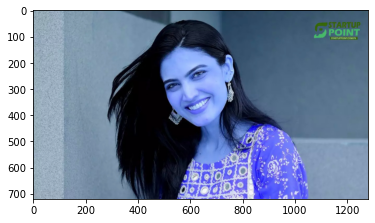

In [181]:
plt.imshow(img)

In [182]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(720, 1280)

In [183]:
gray

array([[165, 165, 169, ...,  97,  98,  98],
       [156, 156, 156, ...,  97,  98,  98],
       [156, 156, 157, ...,  97,  98,  98],
       ...,
       [166, 170, 174, ..., 162, 162, 162],
       [160, 165, 170, ..., 162, 162, 162],
       [157, 160, 166, ..., 162, 162, 162]], dtype=uint8)

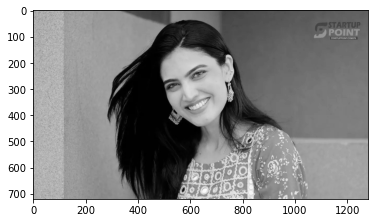

In [184]:
plt.imshow(gray, cmap = 'gray')

IMPORT HAAR CASCADE MODELS FOR FACE INDENTITIFIER OR EYES+ FACIAL RECOGINATION

In [185]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)
faces


array([[445, 146, 292, 292]])

In [186]:
(x,y,w,h) = faces[0]
x,y,w,h

(445, 146, 292, 292)

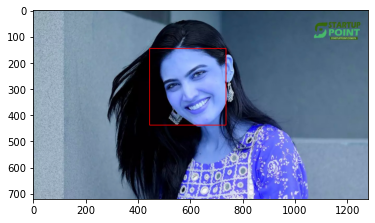

In [187]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

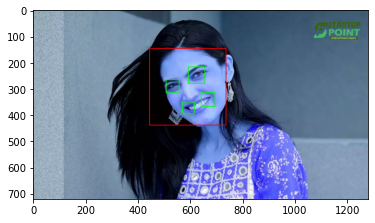

In [188]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

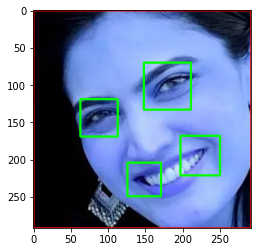

In [189]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [190]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

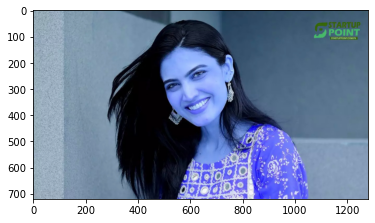

In [191]:
original_image = cv2.imread('./test_img/iqra2.jpg')
plt.imshow(original_image)

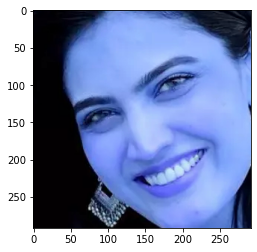

In [192]:
cropped_image = get_cropped_image_if_2_eyes('./test_img/iqra2.jpg')
plt.imshow(cropped_image)

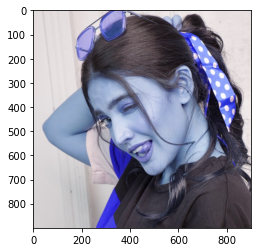

In [193]:
original_image_obs = cv2.imread('./test_img/com_.jpg')
plt.imshow(original_image_obs)

In [194]:
cropped_image_no_eyes = get_cropped_image_if_2_eyes('./test_img/com_.jpg')
cropped_image_no_eyes


DECLARING THE PAATH OF DATASET FOLDER BY THE NAME OF PATH_TO_DATA OR CROPPED TO CR_DATA

In [195]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [196]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [197]:
img_dirs

['./dataset/cropped',
 './dataset/ducky_bhai',
 './dataset/ganji_swag',
 './dataset/iqra_kanwal',
 './dataset/maaz_safdar',
 './dataset/ukhano']

IMPORT OS MODEL FOR MAKING DIRECTORIES AND FOLDER BY PROGRAMMITICALY AND MAKING CROPPED FOLDER

In [198]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

CREATING CROPPED IMAGE FROM IMAGE AND SAVE INTO NEW FOLDER BY ITS CELEBRITY NAMES

In [199]:
cropped_image_dirs = []
youtubers_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    youtubers_name = img_dir.split('/')[-1]
    print(youtubers_name)
    
    youtubers_file_names_dict[youtubers_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + youtubers_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped image in folder ",cropped_folder)
            
            cropped_file_name = youtubers_name + str(count)+ ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            youtubers_file_names_dict[youtubers_name].append(cropped_file_path)
            count += 1

cropped
ducky_bhai
Generating Cropped image in folder  ./dataset/cropped/ducky_bhai
ganji_swag
Generating Cropped image in folder  ./dataset/cropped/ganji_swag
iqra_kanwal
Generating Cropped image in folder  ./dataset/cropped/iqra_kanwal
maaz_safdar
Generating Cropped image in folder  ./dataset/cropped/maaz_safdar
ukhano
Generating Cropped image in folder  ./dataset/cropped/ukhano


WE HAVE CROPPED FOLDERS OR ALL IMAGES NOW WE HAVE TO CHECK MANUALLY AND DELETE THOSE PIC WHICH ARENOT NEEDED AND DIDNOT MATCHED < MANUALLY >

DATA CLEANING

PROCESSING WAVLET MODEL FOR IMAGE FACIAL RECGINATION AND TRAINING MODEL

In [201]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale 
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)    
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

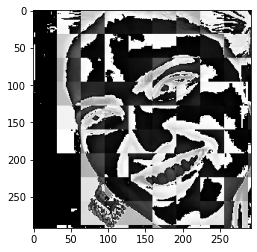

In [202]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [210]:
youtubers_file_names_dict

{'cropped': [],
 'ducky_bhai': ['./dataset/cropped/ducky_bhai/ducky_bhai1.png',
  './dataset/cropped/ducky_bhai/ducky_bhai2.png',
  './dataset/cropped/ducky_bhai/ducky_bhai3.png',
  './dataset/cropped/ducky_bhai/ducky_bhai4.png',
  './dataset/cropped/ducky_bhai/ducky_bhai5.png',
  './dataset/cropped/ducky_bhai/ducky_bhai6.png',
  './dataset/cropped/ducky_bhai/ducky_bhai7.png',
  './dataset/cropped/ducky_bhai/ducky_bhai8.png',
  './dataset/cropped/ducky_bhai/ducky_bhai9.png',
  './dataset/cropped/ducky_bhai/ducky_bhai10.png',
  './dataset/cropped/ducky_bhai/ducky_bhai11.png',
  './dataset/cropped/ducky_bhai/ducky_bhai12.png',
  './dataset/cropped/ducky_bhai/ducky_bhai13.png',
  './dataset/cropped/ducky_bhai/ducky_bhai14.png',
  './dataset/cropped/ducky_bhai/ducky_bhai15.png',
  './dataset/cropped/ducky_bhai/ducky_bhai16.png',
  './dataset/cropped/ducky_bhai/ducky_bhai17.png',
  './dataset/cropped/ducky_bhai/ducky_bhai18.png',
  './dataset/cropped/ducky_bhai/ducky_bhai19.png',
  './datas

MAKING A CLASS DICTINOARY AND ASSING A SPECFIC NUMBERS TO EACH CLASS e.g ducky=0,mooro=5 etc THESE ARE CALLED Y 

In [209]:
class_dict = {}
count = 0
for youtubers_name in youtubers_file_names_dict.keys():
    class_dict[youtubers_name] = count
    count = count + 1
class_dict 

{'cropped': 0,
 'ducky_bhai': 1,
 'ganji_swag': 2,
 'iqra_kanwal': 3,
 'maaz_safdar': 4,
 'ukhano': 5}

Because of assining numbers for folders we get our X, Y , from that way we begin our model training x is = combined image of grayscale+wavlet or y is = youtubers 

In [208]:
x = []
y = []

for youtubers_name, training_files in youtubers_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[youtubers_name])

these are the length of the pictures 48 are the total picture in our folders and each pic containg size is 4096 this is equal to  grey scale 32*32*3 + wavlet pic 32*32 = 4096

In [211]:
len(x)

64

In [212]:
len(x[0])

4096

In [213]:
x = np.array(x).reshape(len(x),4096).astype(float)

In [214]:
x.shape

(64, 4096)

we converted array into float 

In [215]:
x[0]

array([ 25.,  31.,  22., ..., 249., 185.,  39.])

DATA CLEANING IS DONE BY MANUALLY AND PROGRAMMITACLY AND WE HAVE X AND Y < THEN WE ARE READY TO TRAIN OUR MODEL AND WE ARE USING SVM 

                              MODEL TRANING

In [216]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8125

In [219]:
len(x_test)

16

In [220]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         8
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2

    accuracy                           0.81        16
   macro avg       0.51      0.50      0.48        16
weighted avg       0.77      0.81      0.77        16



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


grid search cv

In [221]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [222]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [223]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.666667,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.644444,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.473333,{'logisticregression__C': 1}


In [224]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [225]:
best_estimators['svm'].score(x_test,y_test)

0.75

In [226]:
best_estimators['random_forest'].score(x_test,y_test)

0.625

In [227]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.75

In [228]:
best_clf = best_estimators['svm']

In [229]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[4, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 8, 0, 0],
       [1, 0, 0, 0, 0],
       [2, 0, 0, 0, 0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

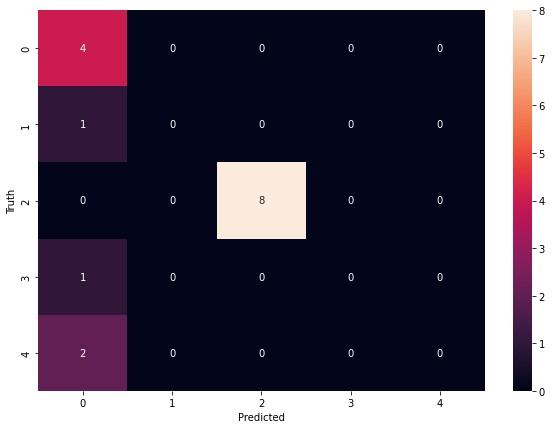

In [230]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [235]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [234]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))